# Indicator data with matplotlib
____

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt
import webbrowser
from IPython.display import YouTubeVideo

style.use('fivethirtyeight')


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

MA1 = 10
MA2 = 30
def moving_average(values, window):
    weights = np.repeat(1.0, window) / window
    smas    = np.convolve(values, weights, 'valid')
    return smas


    
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 1, colspan = 1)
    plt.title(stock)
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan = 4, colspan = 1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1)
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1m/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})
    # Area for data for ax2
    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
    # added funcs here
    ma1 = moving_average(closep, MA1)
    ma2 = moving_average(closep, MA2)
    start = len(date[MA2]-1:)
    
    h_1 = list(map(lambda x, y: x - y, highp, lowp))
    ax1.plot_date(date, h_1,'-')

    candlestick_ohlc(ax2, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax2.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax2.grid(True)
    bbox_props = dict(boxstyle = 'round', fc = 'w', ec = 'k', lw = 1)
    ax2.annotate.(str(closep[-1], (date[-1], closep[-1]), 
                  xytext = (date[-1] + 4, closep[-1]), bbox = bbox_props)
    #font_dict = {'family':'serif', 'color': 'dark red', 'size':15}
    #ax2.text(date[10], closep[1],'Text Example', fontdict = font_dict)
    #ax2.annotate('Big News', (date[11], highp[11]), xytext = (0.8, 0.9), textcoords = 'axes fraction',
                arrowprops = dict(facecolor = 'grey', color = 'grey'))
    
    # for ax3
    ax3.plot(date[-start:], ma1[-start:])
    ax3.plot(date[-start:], ma3[-start:])
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('ebay')

C:\Users\PC\Miniconda2\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


AttributeError: 'module' object has no attribute 'request'

In [ ]:
webbrowser.open('https://pythonprogramming.net/implementing-subplots-matplotlib-tutorial/')

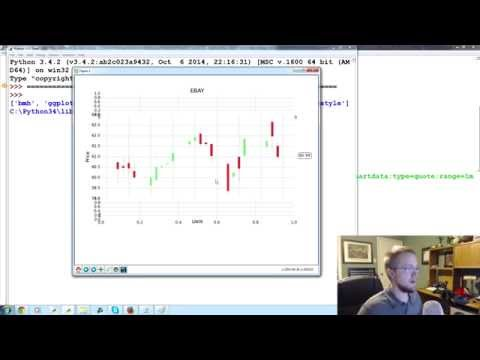

In [3]:
YouTubeVideo('T6y2LRcX9qM')

points I wrote after reading the notes on the website
1. adding data to the indictor graphs using simple functions
2. the functions are moving_average and high_minus_low 
3. dont care about the details just the concept is of value here
4. moving_average on ax3 and high_minus_low on ax1
5. 

summary from the vid
1. moving average used to calculate trends (he explains it well)
2. move to area of data for the candlestick graph to use the moving_average
3. purposely showed the an error if start not included
4. he further enforced to not worry about the specifics of the functions.
5. the error (ValueError) was x and y must have same first dimension the len() of x and y not the same one is shorter
6. len(date) = 522 and len(ma1) equaled 513 this was causing the error
7. to solve the issue ax3.plot(date, ma1)-----> ax3.plot(date[-start:], ma1[-start:])